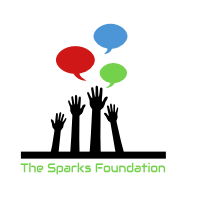

## _PROBLEM STATEMENT_
<br>
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. Data can be found at this <a href='http://bit.ly/w-data'>link</a>.


To get started with data analysis and preprocessing we need to to import some python libraries.

### Importing Modules/Libraries

In [45]:
import numpy as np  
import pandas as pd
import plotly.express as px

##### Now we will assign the dataset to a dataframe named 'data' using read_csv method from pandas module and output the first five rows using the head() method.

In [46]:
data = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Data visualization 

For the visualization purpose we'll make use of plotly.express library which can be used to make good interactive graphs easily.

Lets create a scatter plot of the data with independent variable on horizontal axis and dependent variable on vertical axis.

In [47]:
fig = px.scatter(data,x="Hours", y="Scores")
fig.update_layout(
    height=300,
    title_text='Hours Studied v/s Marks Scored'
)
fig.show()

Looking at the graph we can see that there is some linear relationship(y = slope*x + intercept) between the Hours studied and Marks scored. For a quick analysis we can create a trendline in the above chart using 'trendline' attribute.

In [48]:
fig = px.scatter(data,x="Hours", y="Scores",trendline='ols',trendline_color_override='green')
fig.update_layout(
    height=300,
    title_text='Hours Studied v/s Marks Scored'
)
fig.show()

Now we see that there is a linear relationship between the one and only independent variable and dependent variable we can apply a linear regression model from the scikit-learn library. To do so wee need to import required methods. 

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

We need to reshape our data into a 2D array so that our model can be trained properly. 
<br>
<br>
Next We need to split our data into train set and test set to evaluate the model made using the train set over the test set and to see how it performs.  
For this task i have splitted data int 80:20 -> trainset:testset such that we get 20 samples in training set and 5 in test set out of overall 25 samples.

In [50]:
X = data['Hours'].values
Y = data['Scores'].values
X = X.reshape(-1,1)
Y = Y.reshape(-1,1)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)

In [52]:
linreg = LinearRegression().fit(X_train, y_train) #training the algorithm

Since it is a linear regression model we can get the slope and intercept values using the attributes below

In [53]:
slope = linreg.coef_
intercept = linreg.intercept_
print("Slope = {}\nIntercept = {}".format(slope,intercept))

Slope = [[9.76281166]]
Intercept = [2.62113904]


Now that we have trained our algorithm, it’s time to make some predictions. To do so, we will use our test data and see how accurately our algorithm predicts the Marks score.

In [55]:
y_pred = linreg.predict(X_test)

In [56]:
actpred = pd.DataFrame({'Actual Marks': y_test.flatten(), 'Predicted Marks': y_pred.flatten()})
actpred

,Actual Marks,Predicted Marks
0,21,27.028168
1,30,36.790980
2,42,34.838418
3,24,21.170481
4,30,28.980731


### Evaluation of the Model

In [57]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.765903760749157
Mean Squared Error: 28.557913933975236
Root Mean Squared Error: 5.343960510143693


We get a RMSE around 3, it is not much accurate and can be improved further but for our task this output good predictions.

### Solution to the Query

We need to predict how many marks a student may score if he/she studied for 9.25 hours. Lets get this. 


In [58]:
mat9_25 = [[9.25]]
pred9_25 = linreg.predict(mat9_25)
print('A student can score around {} marks if he/she study for 9.25 hours'.format(pred9_25))

A student can score around [[92.92714692]] marks if he/she study for 9.25 hours
